# Example: how `pybreathe` works on dummy files?

**This notebook is dedicated to the BreathingSignals object.**  
It is useful for analysing breathing movements (thorax & abdomen).

Import of required modules (just for the example) &#8628;

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import *BreathingSignals* object from pybreathe &#8628;

In [2]:
from pybreathe import BreathingMovement, BreathingSignals

Sine creation and storage in a dataframe &#8628;

In [3]:
PI = np.pi
hz = 100
f_sin = 0.3
duration = 40

t = np.linspace(0, duration, duration * hz, endpoint=False)
arg = 2 * PI * f_sin * t

nb_sin = 4
nb_signals = 6

noisy_sinusoids = []
for i in range(nb_signals):
    signal = np.zeros_like(t)
    for _ in range(nb_sin):
        amp = np.random.uniform(0.1, 0.2)
        freq = np.random.uniform(1, 5)
        phase = np.random.uniform(0, 2*np.pi)
        signal += amp * np.sin(freq * t + phase)
    noisy_sinusoids.append(signal)

# Initial noisy sine.
y0 = np.sin(arg) + noisy_sinusoids[0]

# Let's create five sinusoids with different phases from the original one (y0) 
y1 = np.sin(arg) + noisy_sinusoids[1]
y2 = np.sin(arg + PI/6) + noisy_sinusoids[2]
y3 = np.sin(arg + PI/4) + noisy_sinusoids[3]
y4 = np.sin(arg + PI/2) + noisy_sinusoids[4]
y5 = np.sin(arg + PI) + noisy_sinusoids[5]

# Data storage in a DataFrame.
sin_0 = pd.DataFrame({"time": t, "values": y0})
sin_1 = pd.DataFrame({"time": t, "values": y1})
sin_2 = pd.DataFrame({"time": t, "values": y2})
sin_3 = pd.DataFrame({"time": t, "values": y3})
sin_4 = pd.DataFrame({"time": t, "values": y4})
sin_5 = pd.DataFrame({"time": t, "values": y5})

Sinusoids plot &#8628;

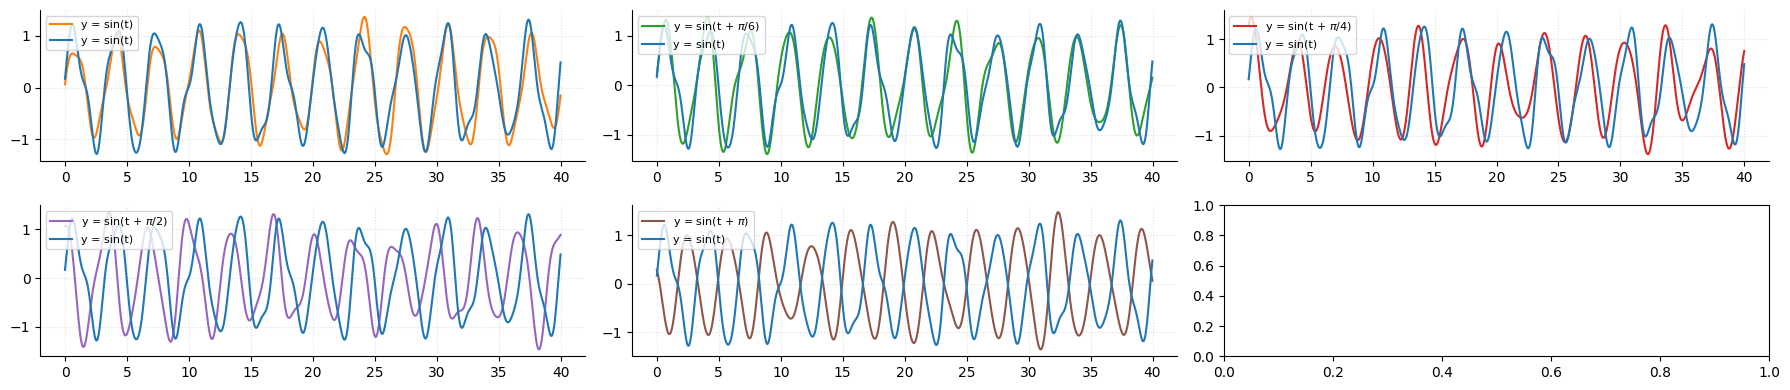

In [4]:
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(figsize=(18,4), nrows=2, ncols=3)

ax1.plot(t, y1, label="y = sin(t)", c="C1")
ax2.plot(t, y2, label="y = sin(t + $\\pi/6)$", c="C2")
ax3.plot(t, y3, label="y = sin(t + $\\pi/4)$", c="C3")
ax4.plot(t, y4, label="y = sin(t + $\\pi/2)$", c="C4")
ax5.plot(t, y5, label="y = sin(t + $\\pi)$", c="C5")

for ax in fig.get_axes()[:-1]:
    ax.plot(t, y0, label="y = sin(t)", c="C0")
    ax.legend(loc="upper left", fontsize=8)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(alpha=0.4, linestyle=":", ms=0.1)

plt.tight_layout()

Instantiation of objects of type **BreathingSignals** with sinusoidal data &#8628;

In [5]:
mov_1 = BreathingSignals(
    flow=None,
    thorax=BreathingMovement.from_dataframe(df=sin_0, movement_type="sin(t)", identifier="sin (t) vs. sin (t)"),
    abdomen=BreathingMovement.from_dataframe(df=sin_1, movement_type="sin(t)", identifier="sin (t) vs. sin (t)")
)

mov_2 = BreathingSignals(
    flow=None,
    thorax=BreathingMovement.from_dataframe(df=sin_0, movement_type="sin(t)", identifier="sin (t) vs. sin (t + $\\pi/6$)"),
    abdomen=BreathingMovement.from_dataframe(df=sin_2, movement_type="sin(t + $\\pi/6)$", identifier="sin (t) vs. sin (t + $\\pi/6$)")
)

mov_3 = BreathingSignals(
    flow=None,
    thorax=BreathingMovement.from_dataframe(df=sin_0, movement_type="sin(t)", identifier="sin (t) vs. sin (t + $\\pi/4$)"),
    abdomen=BreathingMovement.from_dataframe(df=sin_3, movement_type="sin(t + $\\pi/4)$", identifier="sin (t) vs. sin (t + $\\pi/4$)")
)

mov_4 = BreathingSignals(
    flow=None,
    thorax=BreathingMovement.from_dataframe(df=sin_0, movement_type="sin(t)", identifier="sin (t) vs. sin (t + $\\pi/2$)"),
    abdomen=BreathingMovement.from_dataframe(df=sin_4, movement_type="sin(t + $\\pi/2)$", identifier="sin (t) vs. sin (t + $\\pi/2$)")
)

mov_5 = BreathingSignals(
    flow=None,
    thorax=BreathingMovement.from_dataframe(df=sin_0, movement_type="sin(t)", identifier="sin (t) vs. sin (t + $\\pi$)"),
    abdomen=BreathingMovement.from_dataframe(df=sin_5, movement_type="sin(t + $\\pi)$", identifier="sin (t) vs. sin (t + $\\pi$)")
)

Call the **plot** method: simple plot of the movements &#8628;

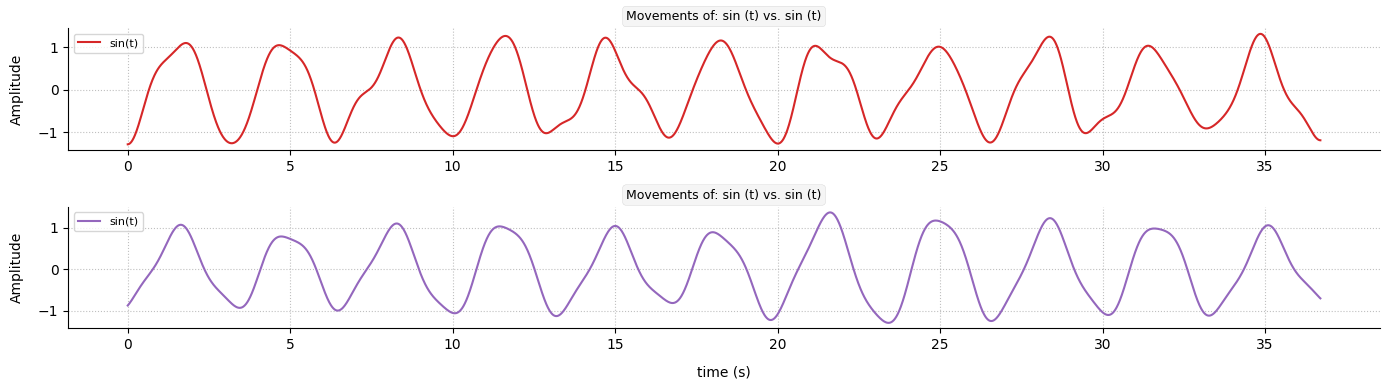

In [6]:
mov_1.plot()

Call the **plot** method with the optional argument **overlay** set to **True**: simple plot of the movements on the same axis (superposition) &#8628;

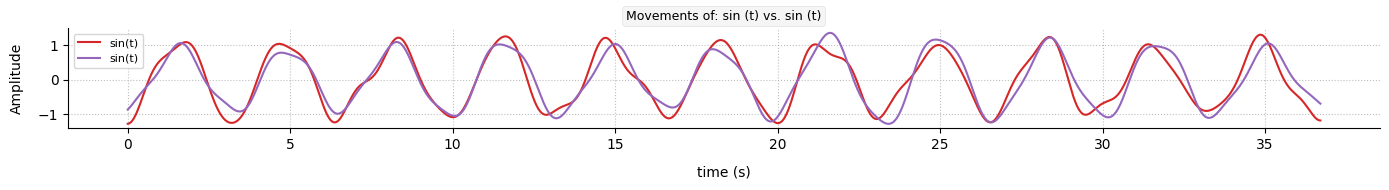

In [7]:
mov_1.plot(overlay=True)

Call the **plot** method with the optional argument **output_path**: plot the movements and save the figure in the desired location &#8628;

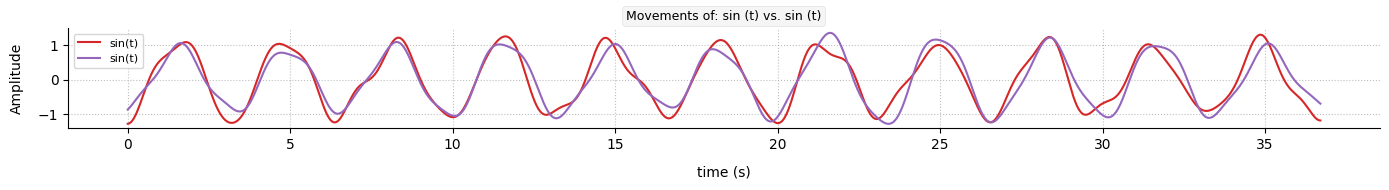

In [8]:
mov_1.plot(overlay=True, output_path=r"\\wsl.localhost\Ubuntu\home\tcoustillet\test\test_movements_1.pdf")

Call the **get_coherence** method: plot the movements and assess their synchronisation &#8628;

normal: 100%; disrupted: 0%; asynchronous: 0%; paradoxical: 0%


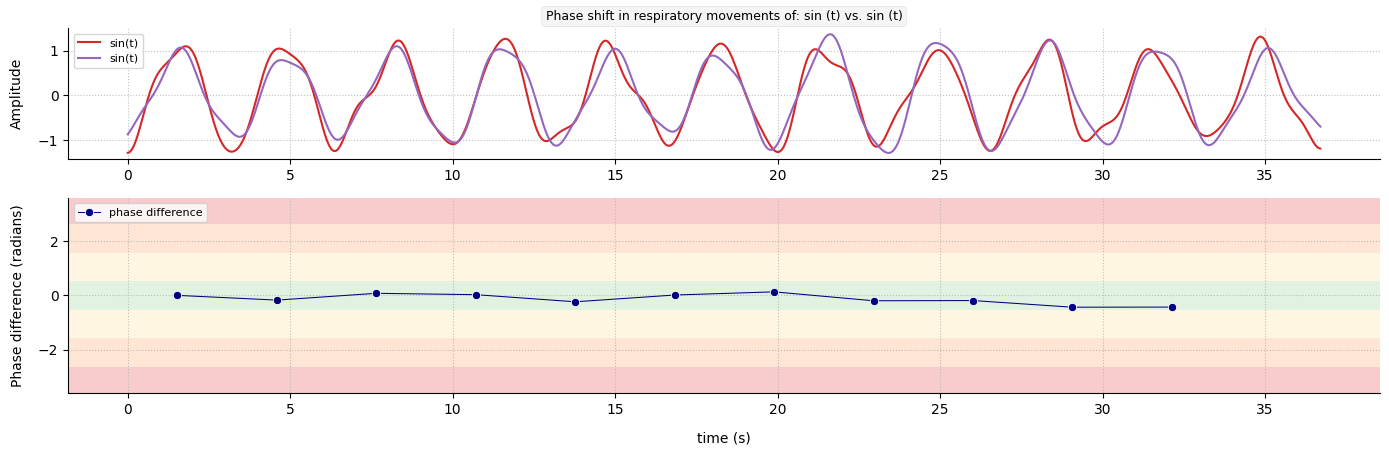

In [9]:
mov_1.get_coherence()

Call the **get_coherence** method with the optional argument **view** set to **False** and **return_vals** set to **True**: returns only the percentage of time spent in each synchronisation or desynchronisation phase &#8628;

In [10]:
mov_1.get_coherence(view=False, return_vals=True)

{'normal': 100, 'disrupted': 0, 'asynchronous': 0, 'paradoxical': 0}

Call the **get_coherence** method with the optional argument **segment_duration**: plot the movements and assess their synchronisation every **segment_duration** seconds.  
By default, the segment duration is set to the signal period &#8628;

normal: 78%; disrupted: 15%; asynchronous: 5%; paradoxical: 1%


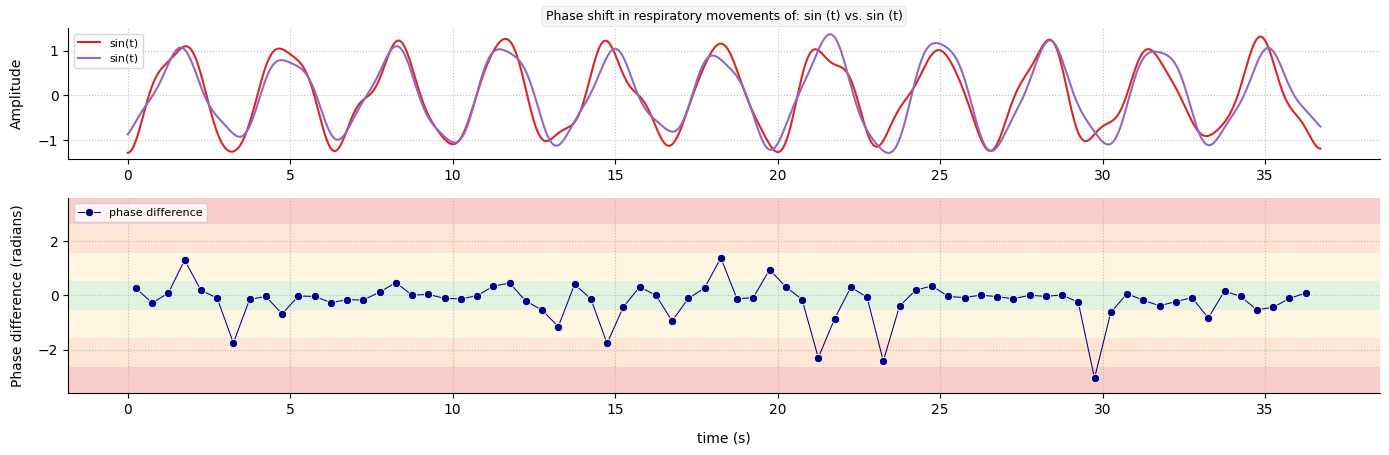

In [11]:
mov_1.get_coherence(segment_duration=0.5)

Call the **get_coherence** method with the optional argument **output_path**: plot the movements, assess their synchronisation and save the figure in the desired location &#8628;

normal: 100%; disrupted: 0%; asynchronous: 0%; paradoxical: 0%


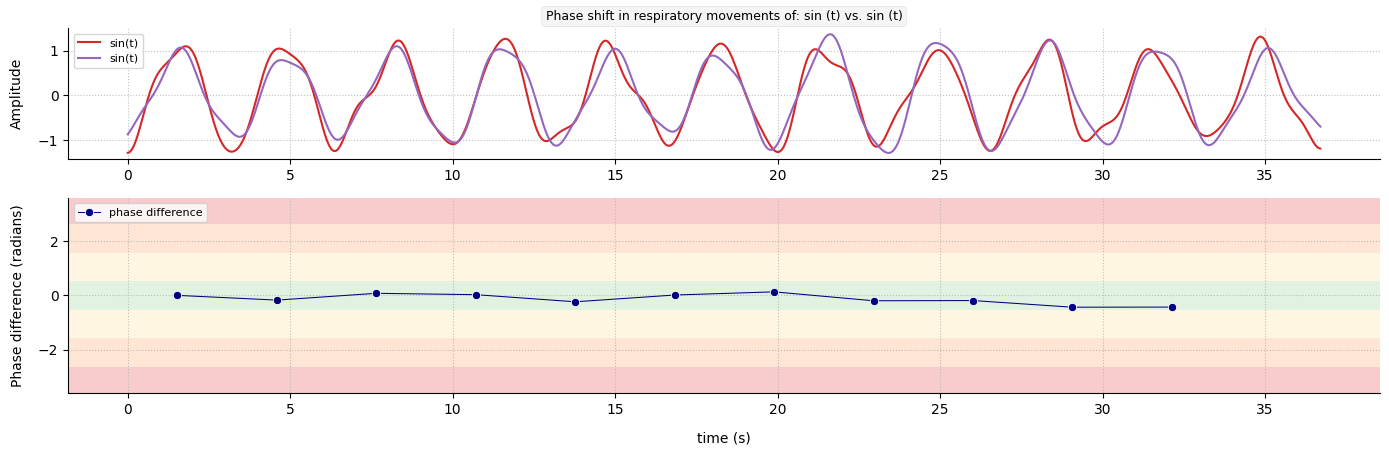

In [12]:
mov_1.get_coherence(output_path=r"\\wsl.localhost\Ubuntu\home\tcoustillet\test\test_sint_vs_sint.pdf")

Example with other 'movements' &#8628;

normal: 100%; disrupted: 0%; asynchronous: 0%; paradoxical: 0%


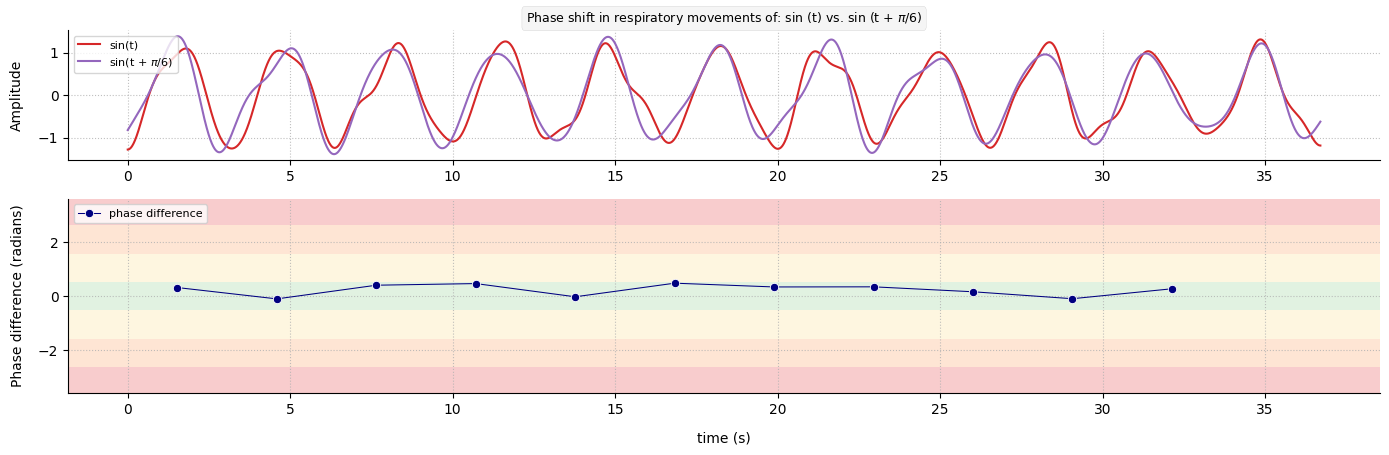

In [13]:
mov_2.get_coherence()

normal: 27%; disrupted: 73%; asynchronous: 0%; paradoxical: 0%


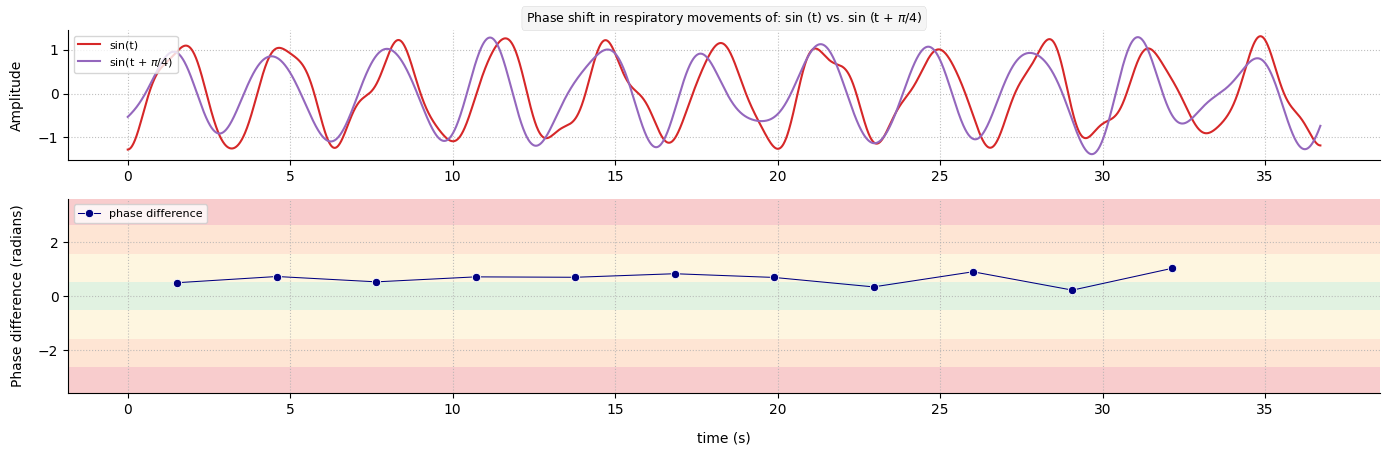

In [14]:
mov_3.get_coherence()

normal: 0%; disrupted: 64%; asynchronous: 36%; paradoxical: 0%


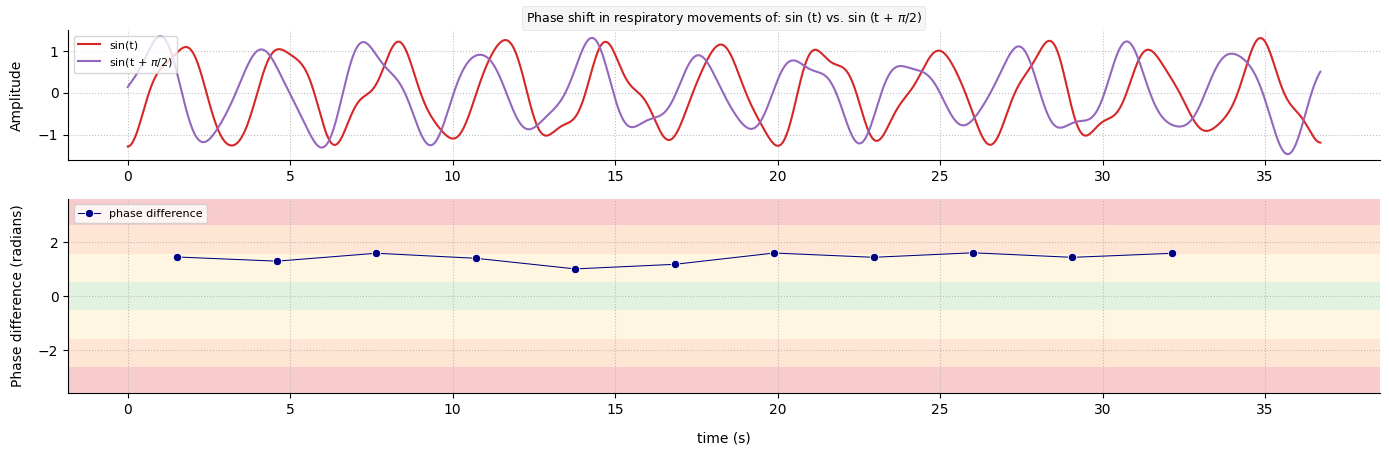

In [15]:
mov_4.get_coherence()

Paradoxical breathing &#8628;

normal: 0%; disrupted: 0%; asynchronous: 0%; paradoxical: 100%


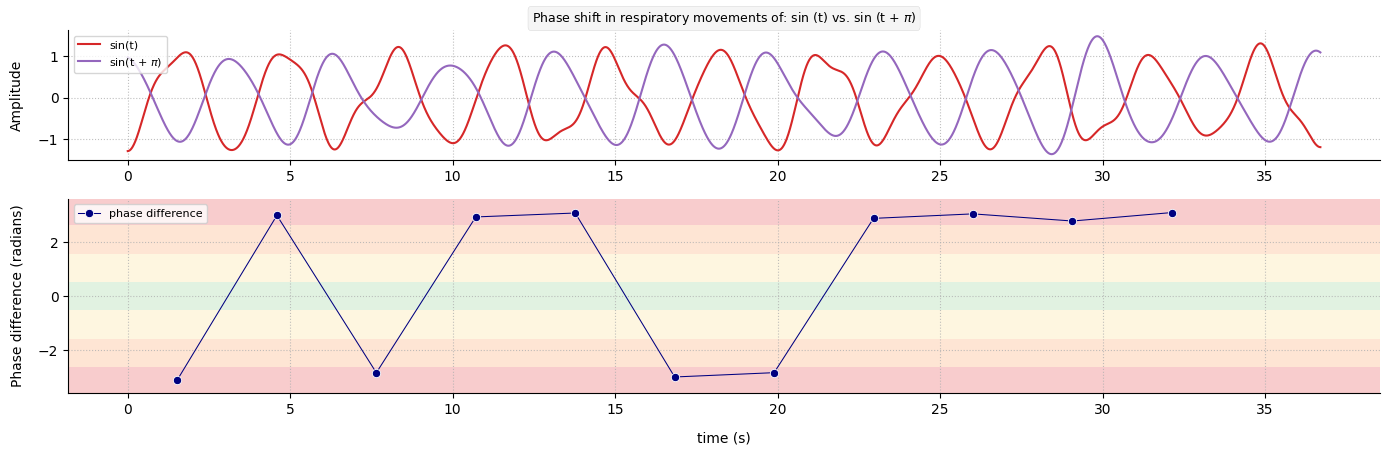

In [16]:
mov_5.get_coherence(output_path=r"\\wsl.localhost\Ubuntu\home\tcoustillet\test\test_paradoxical.pdf")